<a href="https://colab.research.google.com/github/nogahm/HW_Recsys/blob/master/Recsys.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **HW1**

## 1 - Data Analysis
(we analysed all rating not only training)

**a - Average Ratings**

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import operator

In [0]:
# read data into dataframe
# MOVIELENS_DIR = "C:\\Users\\talshemt\\PycharmProjects\\HW_Recsys\\ml-100k"
MOVIELENS_DIR=''
RATING_DATA_FILE = "../u.data"
ratings = pd.read_csv(MOVIELENS_DIR+RATING_DATA_FILE, 
                    sep='\t', 
                    engine='python', 
                    encoding='latin-1',
                    names=['userid', 'movieid', 'rating', 'timestamp'])

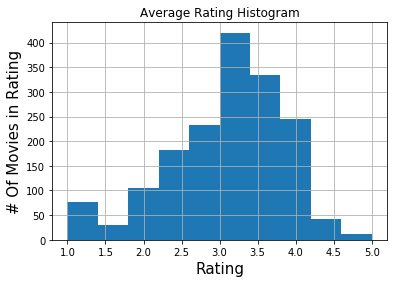

In [32]:
# get average rating for each movie and print histogram
average_rating=ratings.filter(['movieid','rating']).groupby('movieid').mean()
# sort by rating
average_rating.sort_values('rating', inplace=True, ascending=False)
fig = average_rating.hist(column="rating")
plt.title("Average Rating Histogram")
plt.xlabel("Rating", fontsize=15)
plt.ylabel("# Of Movies in Rating", fontsize=15)
plt.show(fig)

In [33]:
# print top 3 movies
average_rating.head(3)

,rating
movieid,
814,5.0
1599,5.0
1201,5.0


**b - Gender Analysis**

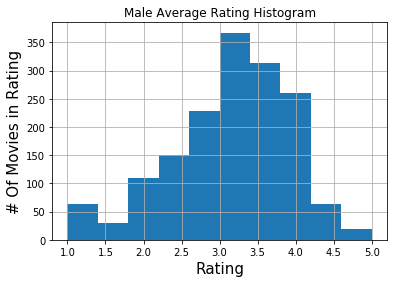

Top 3 movies by males:


,rating
movieid,
1500,5.0
1201,5.0
1605,5.0


In [34]:
# add column gender to ratings
USERS_DATA_FILE = "../u.user"
users = pd.read_csv(MOVIELENS_DIR+USERS_DATA_FILE, 
                    sep='|', 
                    engine='python', 
                    encoding='latin-1',
                    names=['userid', 'age' , 'gender' , 'occupation' , 'zip code'])
merged_users_movies=pd.merge(ratings,users)

#Male Analysis
rating_male=merged_users_movies.loc[merged_users_movies['gender'] == 'M']
average_rating_male = rating_male.filter(['movieid','rating']).groupby('movieid').mean()
# sort by rating
average_rating_male.sort_values('rating', inplace=True, ascending=False)
fig = average_rating_male.hist(column="rating")
plt.title("Male Average Rating Histogram")
plt.xlabel("Rating", fontsize=15)
plt.ylabel("# Of Movies in Rating", fontsize=15)
plt.show(fig)
print("Top 3 movies by males:")
average_rating_male.head(3)


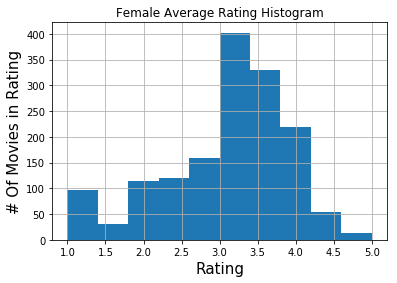

Top 3 movies by females:


,rating
movieid,
1368,5.0
1451,5.0
1594,5.0


In [35]:

#Female Analysis
rating_female=merged_users_movies.loc[merged_users_movies['gender'] == 'F']
average_rating_female = rating_female.filter(['movieid','rating']).groupby('movieid').mean()
# sort by rating
average_rating_female.sort_values('rating', inplace=True, ascending=False)
fig = average_rating_female.hist(column="rating")
plt.title("Female Average Rating Histogram")
plt.xlabel("Rating", fontsize=15)
plt.ylabel("# Of Movies in Rating", fontsize=15)
plt.show(fig)
print("Top 3 movies by females:")
average_rating_female.head(3)

In [36]:
# get average difference between genders
average_rating_male.rename(columns = {'rating':'male_rating'}, inplace = True)
average_rating_female.rename(columns = {'rating':'female_rating'}, inplace = True)
merged_users_averages=pd.merge(average_rating_male,average_rating_female,left_index=True,right_index=True,how='outer')
# remove NAN
merged_users_averages=merged_users_averages[np.isfinite(merged_users_averages['female_rating'])]
merged_users_averages=merged_users_averages[np.isfinite(merged_users_averages['male_rating'])]
# get difference
difference_between_genders=merged_users_averages.apply(lambda row: (abs(row['male_rating']-row['female_rating'])), axis=1)
difference_between_genders_df = pd.DataFrame({'movieid':difference_between_genders.index, 'difference':difference_between_genders.values})
# get average difference between genders
print('Average of differences between male and female ratings: ')
print(difference_between_genders_df['difference'].mean())

# get top 5 movies with largest difference
    #sort ascending:
difference_between_genders_df.sort_values('difference', inplace=True, ascending=False)
    #print top 5
print('Top 5 movies with the greatest difference in ratings between genders: ')
difference_between_genders_df.head(5)

Average of differences between male and female ratings: 
0.508856945912609
Top 5 movies with the greatest difference in ratings between genders: 


,movieid,difference
1271,1306,4.000000
839,851,3.666667
1352,1429,3.500000
636,641,3.419355
1432,1592,3.250000


**c - Genre Analysis**

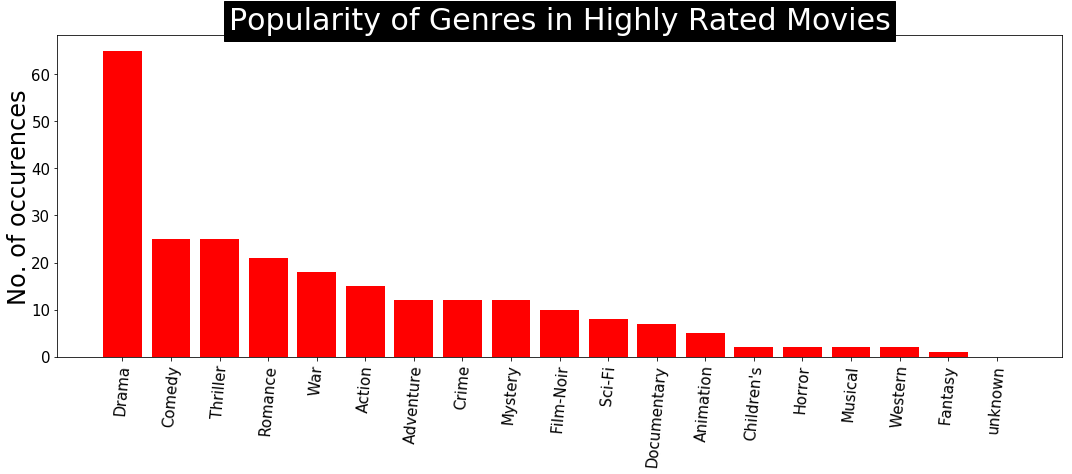

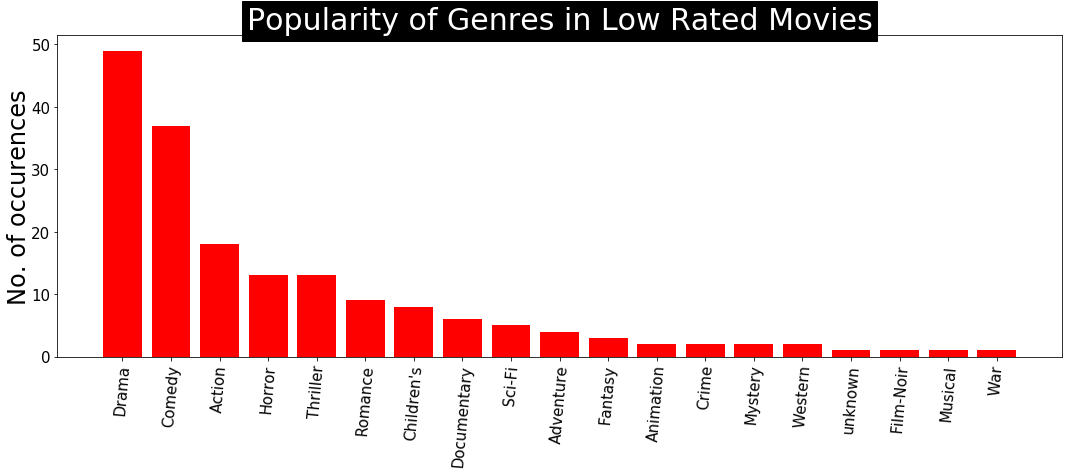

In [37]:
# add column genre to ratings
# read movie info with genre data
USERS_DATA_FILE = "../u.item"
genre = pd.read_csv(MOVIELENS_DIR+USERS_DATA_FILE, 
                    sep='|', 
                    engine='python', 
                    encoding='latin-1',
                    names=['movieid', 'movie title', 'release date', 'video release date',
              'IMDb URL',  'unknown',  'Action',  'Adventure',  'Animation',
              'Children\'s', 'Comedy',  'Crime', 'Documentary', 'Drama',  'Fantasy', 'Film-Noir','Horror','Musical', 'Mystery', 'Romance', 'Sci-Fi',
              'Thriller', 'War', 'Western'])

# merge movie info with movie ratings and user data and sort by rating
merged_average_rating_genre=pd.merge(average_rating,genre, left_index=True,right_on='movieid', how='outer')

# Analyze genre distribution for high rated movies (rating bigger than 4):
high_rated_indexes = merged_average_rating_genre['rating']>4.0
high_rated = merged_average_rating_genre[high_rated_indexes]

# Count high-rated movies per genre
genres = ['unknown','Action','Adventure','Animation','Children\'s','Comedy','Crime','Documentary','Drama','Fantasy','Film-Noir','Horror',
'Musical','Mystery','Romance','Sci-Fi','Thriller','War','Western']
genres_count = {}
for g in genres:
    count = 0
    genre_movies = high_rated[g] == 1
    genres_count[g] = high_rated[genre_movies].shape[0]
genres_count_list = sorted(genres_count.items(), key=operator.itemgetter(1),reverse=True)

#Display genre count distribution for highly rated movies:
fig = plt.figure(1, figsize=(18,13))
ax2 = fig.add_subplot(2,1,2)
y_axis = [genre[1] for genre in genres_count_list]
x_axis = [i for i in range(len(genres_count))]
x_label = [genre[0] for genre in genres_count_list]
plt.xticks(rotation=85, fontsize = 15)
plt.yticks(fontsize = 15)
plt.xticks(x_axis, x_label)
plt.ylabel("No. of occurences", fontsize = 24, labelpad = 0)
ax2.bar(x_axis, y_axis, align = 'center', color='r')
plt.title("Popularity of Genres in Highly Rated Movies",bbox={'facecolor':'k', 'pad':5},color='w',fontsize = 30)
plt.show()


# Analyze genre distribution for low rated movies (rating below 2):
low_rated_indexes = merged_average_rating_genre['rating']<2.0
low_rated = merged_average_rating_genre[low_rated_indexes]

# Count high-rated movies per genre
genres_count = {}
for g in genres:
    count = 0
    genre_movies = low_rated[g] == 1
    genres_count[g] = low_rated[genre_movies].shape[0]
genres_count_list = sorted(genres_count.items(), key=operator.itemgetter(1),reverse=True)

#Display genre count distribution for highly rated movies:
fig = plt.figure(1, figsize=(18,13))
ax2 = fig.add_subplot(2,1,2)
y_axis = [genre[1] for genre in genres_count_list]
x_axis = [i for i in range(len(genres_count))]
x_label = [genre[0] for genre in genres_count_list]
plt.xticks(rotation=85, fontsize = 15)
plt.yticks(fontsize = 15)
plt.xticks(x_axis, x_label)
plt.ylabel("No. of occurences", fontsize = 24, labelpad = 0)
ax2.bar(x_axis, y_axis, align = 'center', color='r')
plt.title("Popularity of Genres in Low Rated Movies",bbox={'facecolor':'k', 'pad':5},color='w',fontsize = 30)
plt.show()


Genre Distribution Analysis for Demographic Details

Gender Based

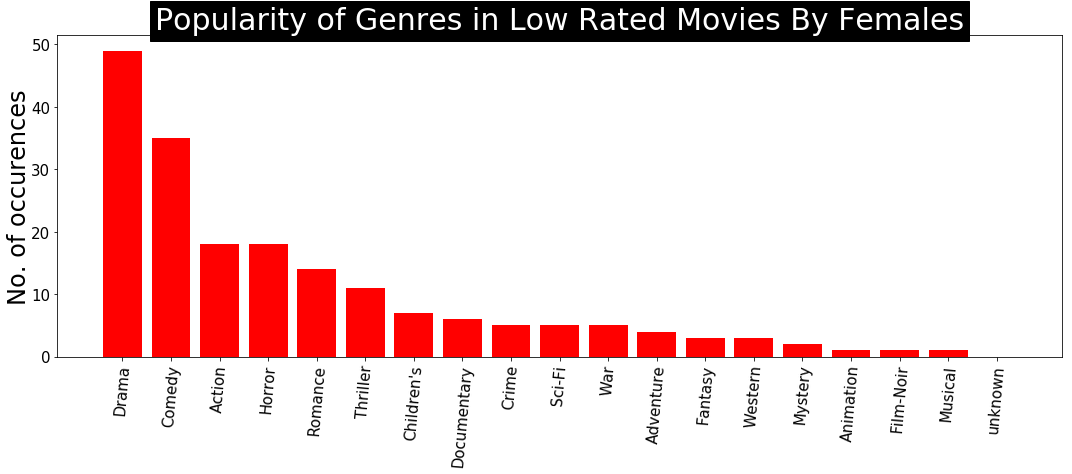

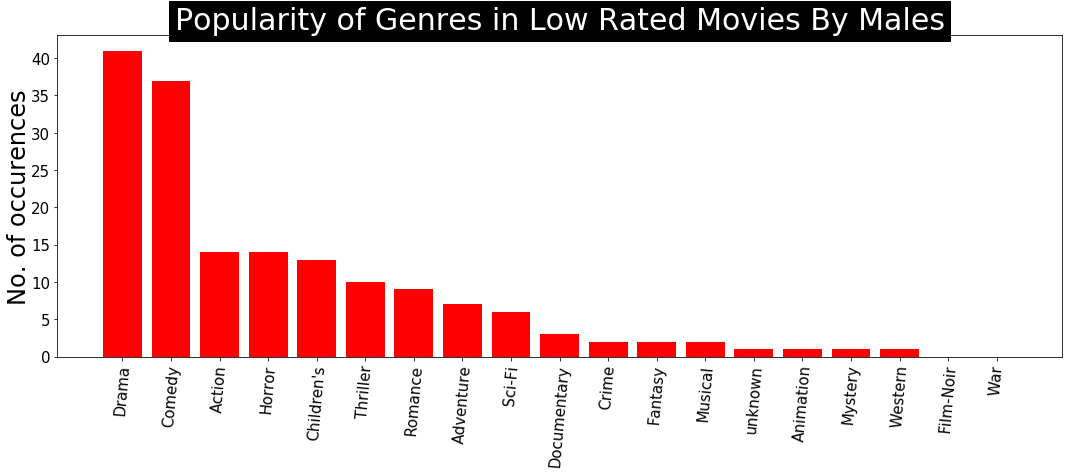

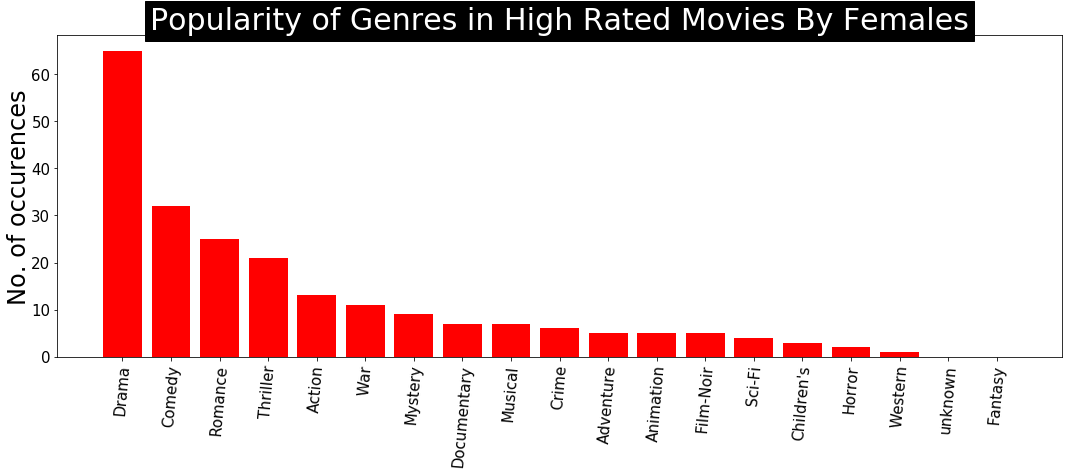

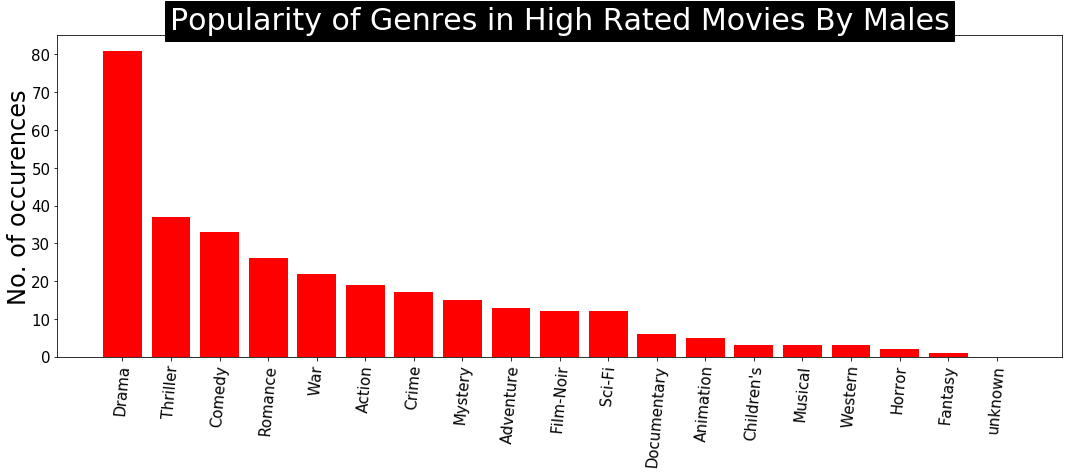

In [38]:
#Female + Low Rating
female_average_rating_genre=pd.merge(average_rating_female,genre, left_index=True,right_on='movieid', how='inner')

# Analyze genre distribution for low rated movies (rating below 2):
low_rated_indexes = female_average_rating_genre['female_rating']<2.0
low_rated = female_average_rating_genre[low_rated_indexes]

# Count high-rated movies per genre
genres_count = {}
for g in genres:
    count = 0
    genre_movies = low_rated[g] == 1
    genres_count[g] = low_rated[genre_movies].shape[0]
genres_count_list = sorted(genres_count.items(), key=operator.itemgetter(1),reverse=True)

#Display genre count distribution for highly rated movies:
fig1 = plt.figure(1, figsize=(18,13))
ax2 = fig1.add_subplot(2,1,2)
y_axis = [genre[1] for genre in genres_count_list]
x_axis = [i for i in range(len(genres_count))]
x_label = [genre[0] for genre in genres_count_list]
plt.xticks(rotation=85, fontsize = 15)
plt.yticks(fontsize = 15)
plt.xticks(x_axis, x_label)
plt.ylabel("No. of occurences", fontsize = 24, labelpad = 0)
ax2.bar(x_axis, y_axis, align = 'center', color='r')
plt.title("Popularity of Genres in Low Rated Movies By Females",bbox={'facecolor':'k', 'pad':5},color='w',fontsize = 30)
plt.show()

#Male + Low Rating
male_average_rating_genre=pd.merge(average_rating_male,genre, left_index=True,right_on='movieid', how='inner')

# Analyze genre distribution for low rated movies (rating below 2):
low_rated_indexes = male_average_rating_genre['male_rating']<2.0
low_rated = male_average_rating_genre[low_rated_indexes]

# Count high-rated movies per genre
genres_count = {}
for g in genres:
    count = 0
    genre_movies = low_rated[g] == 1
    genres_count[g] = low_rated[genre_movies].shape[0]
genres_count_list = sorted(genres_count.items(), key=operator.itemgetter(1),reverse=True)

#Display genre count distribution for highly rated movies:
fig2 = plt.figure(1, figsize=(18,13))
ax2 = fig2.add_subplot(2,1,2)
y_axis = [genre[1] for genre in genres_count_list]
x_axis = [i for i in range(len(genres_count))]
x_label = [genre[0] for genre in genres_count_list]
plt.xticks(rotation=85, fontsize = 15)
plt.yticks(fontsize = 15)
plt.xticks(x_axis, x_label)
plt.ylabel("No. of occurences", fontsize = 24, labelpad = 0)
ax2.bar(x_axis, y_axis, align = 'center', color='r')
plt.title("Popularity of Genres in Low Rated Movies By Males",bbox={'facecolor':'k', 'pad':5},color='w',fontsize = 30)
plt.show()

#Female + High Rating
female_average_rating_genre=pd.merge(average_rating_female,genre, left_index=True,right_on='movieid', how='inner')

# Analyze genre distribution for low rated movies (rating above 4):
low_rated_indexes = female_average_rating_genre['female_rating']>4.0
low_rated = female_average_rating_genre[low_rated_indexes]

# Count high-rated movies per genre
genres_count = {}
for g in genres:
    count = 0
    genre_movies = low_rated[g] == 1
    genres_count[g] = low_rated[genre_movies].shape[0]
genres_count_list = sorted(genres_count.items(), key=operator.itemgetter(1),reverse=True)

#Display genre count distribution for highly rated movies:
fig1 = plt.figure(1, figsize=(18,13))
ax2 = fig1.add_subplot(2,1,2)
y_axis = [genre[1] for genre in genres_count_list]
x_axis = [i for i in range(len(genres_count))]
x_label = [genre[0] for genre in genres_count_list]
plt.xticks(rotation=85, fontsize = 15)
plt.yticks(fontsize = 15)
plt.xticks(x_axis, x_label)
plt.ylabel("No. of occurences", fontsize = 24, labelpad = 0)
ax2.bar(x_axis, y_axis, align = 'center', color='r')
plt.title("Popularity of Genres in High Rated Movies By Females",bbox={'facecolor':'k', 'pad':5},color='w',fontsize = 30)
plt.show()

#Male + High Rating
male_average_rating_genre=pd.merge(average_rating_male,genre, left_index=True,right_on='movieid', how='inner')

# Analyze genre distribution for low rated movies (rating above 4):
low_rated_indexes = male_average_rating_genre['male_rating']>4.0
low_rated = male_average_rating_genre[low_rated_indexes]

# Count high-rated movies per genre
genres_count = {}
for g in genres:
    count = 0
    genre_movies = low_rated[g] == 1
    genres_count[g] = low_rated[genre_movies].shape[0]
genres_count_list = sorted(genres_count.items(), key=operator.itemgetter(1),reverse=True)

#Display genre count distribution for highly rated movies:
fig2 = plt.figure(1, figsize=(18,13))
ax2 = fig2.add_subplot(2,1,2)
y_axis = [genre[1] for genre in genres_count_list]
x_axis = [i for i in range(len(genres_count))]
x_label = [genre[0] for genre in genres_count_list]
plt.xticks(rotation=85, fontsize = 15)
plt.yticks(fontsize = 15)
plt.xticks(x_axis, x_label)
plt.ylabel("No. of occurences", fontsize = 24, labelpad = 0)
ax2.bar(x_axis, y_axis, align = 'center', color='r')
plt.title("Popularity of Genres in High Rated Movies By Males",bbox={'facecolor':'k', 'pad':5},color='w',fontsize = 30)
plt.show()

Conclusions:


*   We can see that the top two genres are: Drama and Comedy for both genders (but more females liked Comedy than men)
*   Some of the genre are similar between the genders but some have differences. For example: Musical is rated as the 7th most popular genre for females, whereas for man it the 14th most popular genre.
* In addition - we can see from the "Low Rated" histograms that the most seen genres are similar to those with high rating in both genders, meaning that they are the most viewed genre in general.



**d - Most popular movies.**

The popularity will be calculated by:
1. We will find the movies that their number of ratings is above the average.
2. From the movies we found we will find the top 20 movies that have the highest average rating.

In [39]:
# Count ratings per movie
count_rating_per_movie = ratings['movieid'].value_counts()
count_rating_per_movie_df = pd.DataFrame({'movieid':count_rating_per_movie.index, 'frequency':count_rating_per_movie.values})

#Merge with average rating:
count_with_rating = pd.merge(average_rating, count_rating_per_movie_df, left_index=True, right_on='movieid', how='inner')

#Get average frequency
avg_freq = count_with_rating['frequency'].mean()

#Get movies with frequency over average frequency
high_freq_indexes = count_with_rating['frequency']>avg_freq
high_freq = count_with_rating[high_freq_indexes]

#Get movies with highest rating within movies with high rating frequency
high_freq.sort_values('rating', inplace=True, ascending=False)

#Get top 20
print('Top 20 most popular movies:')
high_freq.head(20)

Top 20 most popular movies:


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,rating,movieid,frequency
305,4.491071,408,112
34,4.466443,318,298
286,4.466102,169,118
74,4.456790,483,243
483,4.447761,114,67
46,4.445230,64,283
106,4.387560,603,209
55,4.385768,12,267
0,4.358491,50,583
263,4.344000,178,125


# 2 - Non-personal Recommendations



**a - Build and train a model based on linear regression**

In [53]:
#Read training data
from sklearn import datasets, linear_model
from sklearn.metrics import mean_absolute_error, r2_score
RATING_TRAINING_FILE = "../u1.base"
RATING_TEST_FILE = "../u1.test"
ratings_training = pd.read_csv(MOVIELENS_DIR+RATING_TRAINING_FILE, 
                    sep='\t', 
                    engine='python', 
                    encoding='latin-1',
                    names=['userid', 'movieid', 'rating', 'timestamp'])
ratings_test = pd.read_csv(MOVIELENS_DIR+RATING_TEST_FILE, 
                    sep='\t', 
                    engine='python', 
                    encoding='latin-1',
                    names=['userid', 'movieid', 'rating', 'timestamp'])

avg_ratings_training = ratings_training.filter(['movieid','rating']).groupby('movieid').mean()
training = pd.merge(avg_ratings_training, genre, left_index=True, right_on='movieid', how='left')
training_X = training[training.columns[6:]]
training_Y = (training.rating).values

#create and train the model
regr = linear_model.LinearRegression()
regr.fit(training_X, training_Y)

#Evaluate the model with test set
avg_ratings_test = ratings_test.filter(['movieid','rating']).groupby('movieid').mean()
test = pd.merge(avg_ratings_test, genre, left_index=True, right_on='movieid', how='left')
test_X = test[test.columns[6:]]
test_Y = (test.rating).values
test_pred = regr.predict(test_X)

# MAE
print('MAE: \n')
print(mean_absolute_error(test_Y, test_pred))

MAE: 

0.7026804223720173


**b - Recommend 20 new movies for each user**

Random

In [71]:
import random
# Random
users_train=ratings_training.userid.unique()
total_intersection=0
total_retrieved=0
total_relevant=0
# for each user, get random 20 movies he didnt watch
for id in users_train:
  user_movies=ratings_training.loc[ratings_training['userid']==id]
  # get all movies user didnt watch
  movies=list(set(ratings_training['movieid'].tolist()) -  set(user_movies['movieid'].tolist()))
  rec_for_user= list()
  while len(rec_for_user)<20:
    rand=random.choice(movies)
    # add to rec and remove from movies
    rec_for_user.append(rand)
    movies.remove(rand)
  # get number of recoomended movies that the user watched on test
  test_movies_for_user=ratings_test.loc[ratings_test['userid']==id]
 
  intersection=test_movies_for_user[test_movies_for_user['movieid'].isin(rec_for_user)]
  # calculate for precision and recall
  total_intersection=total_intersection+len(intersection)
  total_retrieved=total_retrieved+len(rec_for_user)
  total_relevant=total_relevant+len(test_movies_for_user)
  
print('Random')
print('Precision: ', total_intersection/total_retrieved)
print('Recall: ', total_intersection/total_relevant)


Random
Precision:  0.015376458112407211
Recall:  0.0145


Average

In [78]:
# Average
users_train=ratings_training.userid.unique()
total_intersection=0
total_retrieved=0
total_relevant=0
# sort by prediction rate
predicted=test.copy()
predicted['rating']=test_pred
predicted.sort_values(by='rating', inplace=True, ascending=False)
# for each user, get random 20 movies he didnt watch
for id in users_train:
  user_movies=ratings_training.loc[ratings_training['userid']==id]
  # get all movies user didnt watch
  movies=list(set(predicted['movieid'].tolist()) -  set(user_movies['movieid'].tolist()))
  rec_for_user= list()
             
  while len(rec_for_user)<20:
    rec=movies[0]
    # add to rec and remove from movies
    rec_for_user.append(rec)
    movies.remove(rec)
  # get number of recoomended movies that the user watched on test
  test_movies_for_user=ratings_test.loc[ratings_test['userid']==id]
 
  intersection=test_movies_for_user[test_movies_for_user['movieid'].isin(rec_for_user)]
  # calculate for precision and recall
  total_intersection=total_intersection+len(intersection)
  total_retrieved=total_retrieved+len(rec_for_user)
  total_relevant=total_relevant+len(test_movies_for_user)

print('By Average')
print('Precision: ', total_intersection/total_retrieved)
print('Recall: ', total_intersection/total_relevant)

By Average
Precision:  0.045387062566277836
Recall:  0.0428


Both methods returned low precision and recall. However random recall and precision were lower.
The results make sense, because people dont necessarily watch the highest rated movies, and we need to consider other parameters (information about the user and his tast)

**c - repeat a, b for different genders**

Linear regression prediction (a)

In [79]:
# get only female train and test
ratings_training_f = pd.merge(ratings_training, rating_female, on=['movieid','userid', 'rating','timestamp'], how='right')
ratings_test_f = pd.merge(ratings_test, rating_female, on=['movieid','userid', 'rating','timestamp'], how='right')

avg_ratings_training_f = ratings_training_f.filter(['movieid','rating']).groupby('movieid').mean()
training_f = pd.merge(avg_ratings_training_f, genre, left_index=True, right_on='movieid', how='left')
training_X_f = training_f[training_f.columns[6:]]
training_Y_f = (training_f.rating).values

#create and train the model
regr_f = linear_model.LinearRegression()
regr_f.fit(training_X_f, training_Y_f)

#Evaluate the model with test set
avg_ratings_test_f = ratings_test_f.filter(['movieid','rating']).groupby('movieid').mean()
test_f = pd.merge(avg_ratings_test_f, genre, left_index=True, right_on='movieid', how='left')
test_X_f = test_f[test_f.columns[6:]]
test_Y_f = (test_f.rating).values
test_pred_f = regr_f.predict(test_X_f)

# MAE
print('Female based MAE:')
print(mean_absolute_error(test_Y_f, test_pred_f))

# get only male train and test
ratings_training_m = pd.merge(ratings_training, rating_male, on=['movieid','userid', 'rating','timestamp'], how='right')
ratings_test_m = pd.merge(ratings_test, rating_male, on=['movieid','userid', 'rating','timestamp'], how='right')

avg_ratings_training_m = ratings_training_m.filter(['movieid','rating']).groupby('movieid').mean()
training_m = pd.merge(avg_ratings_training_m, genre, left_index=True, right_on='movieid', how='left')
training_X_m = training_m[training_m.columns[6:]]
training_Y_m = (training_m.rating).values

#create and train the model
regr_m = linear_model.LinearRegression()
regr_m.fit(training_X_m, training_Y_m)

#Evaluate the model with test set
avg_ratings_test_m = ratings_test_m.filter(['movieid','rating']).groupby('movieid').mean()
test_m = pd.merge(avg_ratings_test_m, genre, left_index=True, right_on='movieid', how='left')
test_X_m = test_m[test_m.columns[6:]]
test_Y_m = (test_m.rating).values
test_pred_m = regr_m.predict(test_X_m)

# MAE
print('Male based MAE:')
print(mean_absolute_error(test_Y_m, test_pred_m))

Female based MAE:
0.6337220191216182
Male based MAE:
0.583027167229386


Recommend 20 new movies for each user (b)

In [90]:
import random
# Random
users_train=ratings_training.userid.unique()
total_intersection_M=0
total_retrieved_M=0
total_relevant_M=0
total_intersection_F=0
total_retrieved_F=0
total_relevant_F=0
# for each user, get random 20 movies he didnt watch
for id in users_train:
  user_movies=ratings_training.loc[ratings_training['userid']==id]
  # get all movies user didnt watch
  movies=list(set(ratings_training['movieid'].tolist()) -  set(user_movies['movieid'].tolist()))
  rec_for_user= list()
  while len(rec_for_user)<20:
    rand=random.choice(movies)
    # add to rec and remove from movies
    rec_for_user.append(rand)
    movies.remove(rand)
  # get number of recoomended movies that the user watched on test
  test_movies_for_user=ratings_test.loc[ratings_test['userid']==id]
 
  intersection=test_movies_for_user[test_movies_for_user['movieid'].isin(rec_for_user)]
  # calculate for precision and recall for each gender
  if(len(users.loc[(users['userid']==id) & (users['gender']=='F')])>0):
    total_intersection_F=total_intersection_F+len(intersection)
    total_retrieved_F=total_retrieved_F+len(rec_for_user)
    total_relevant_F=total_relevant_F+len(test_movies_for_user)
  else:
    total_intersection_M=total_intersection_M+len(intersection)
    total_retrieved_M=total_retrieved_M+len(rec_for_user)
    total_relevant_M=total_relevant_M+len(test_movies_for_user)
  
print('Random')
print('Precision Female: ', total_intersection_F/total_retrieved_F)
print('Recall Female: ', total_intersection_F/total_relevant_F)

print('Precision Male: ', total_intersection_M/total_retrieved_M)
print('Recall Male: ', total_intersection_M/total_relevant_M)

Random
Precision Female:  0.01391941391941392
Recall Female:  0.015725222429133042
Precision Male:  0.014701492537313433
Recall Male:  0.012988725522515988


In [91]:
# Average
users_train=ratings_training.userid.unique()
total_intersection_M=0
total_retrieved_M=0
total_relevant_M=0
total_intersection_F=0
total_retrieved_F=0
total_relevant_F=0
# sort by prediction rate
predicted=test.copy()
predicted['rating']=test_pred
predicted.sort_values(by='rating', inplace=True, ascending=False)
# for each user, get random 20 movies he didnt watch
for id in users_train:
  user_movies=ratings_training.loc[ratings_training['userid']==id]
  # get all movies user didnt watch
  movies=list(set(predicted['movieid'].tolist()) -  set(user_movies['movieid'].tolist()))
  rec_for_user= list()
             
  while len(rec_for_user)<20:
    rec=movies[0]
    # add to rec and remove from movies
    rec_for_user.append(rec)
    movies.remove(rec)
  # get number of recoomended movies that the user watched on test
  test_movies_for_user=ratings_test.loc[ratings_test['userid']==id]
 
  intersection=test_movies_for_user[test_movies_for_user['movieid'].isin(rec_for_user)]
  # calculate for precision and recall for each gender
  if(len(users.loc[(users['userid']==id) & (users['gender']=='F')])>0):
    total_intersection_F=total_intersection_F+len(intersection)
    total_retrieved_F=total_retrieved_F+len(rec_for_user)
    total_relevant_F=total_relevant_F+len(test_movies_for_user)
  else:
    total_intersection_M=total_intersection_M+len(intersection)
    total_retrieved_M=total_retrieved_M+len(rec_for_user)
    total_relevant_M=total_relevant_M+len(test_movies_for_user)

print('By Average')
print('Precision Female: ', total_intersection_F/total_retrieved_F)
print('Recall Female: ', total_intersection_F/total_relevant_F)

print('Precision Male: ', total_intersection_M/total_retrieved_M)
print('Recall Male: ', total_intersection_M/total_relevant_M)

By Average
Precision Female:  0.037545787545787544
Recall Female:  0.04241671839437203
Precision Male:  0.048582089552238805
Recall Male:  0.04292213357948177


Conclusion: As we can see the MAE for male is smaller than for females. This can be caused by the difference between the training set sizes (larger for males than for females) which can cause a less training model and overfitting.

Precision and recall are very similar for both genders in both methods, and the results before the division by gender are also similar to those after division.

# 3 - Personal Recommendations

**a - Build a model based on matrix factorization (item similarity and item content)**

In [92]:
!pip install turicreate
import turicreate as tc
from datetime import datetime

     |████████████████████████████████| 85.9MB 1.2MB/s 
     |████████████████████████████████| 2.7MB 34.9MB/s 
     |████████████████████████████████| 23.8MB 2.0MB/s 
ERROR: mxnet 1.1.0.post0 has requirement numpy<1.15.0,>=1.8.2, but you'll have numpy 1.16.3 which is incompatible.
ERROR: mxnet 1.1.0.post0 has requirement requests<2.19.0,>=2.18.4, but you'll have requests 2.21.0 which is incompatible.
  Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1


prepeare the data - remove rare movies

In [93]:
# remove rare movies
rare_items = (tc.SFrame(ratings)).groupby('movieid', tc.aggregate.COUNT()).sort('Count')
rare_items = rare_items[rare_items['Count'] <= 5]

sframe_train = tc.SFrame.read_csv("../u1.base",sep='\t',header=False)
sframe_train = sframe_train.rename({'X1': 'userid','X2':'movieid','X3':'rating','X4':'timestamp'})

train_non_rare=sframe_train.filter_by(rare_items['movieid'], 'movieid', exclude=True)
train_non_rare['timestamp'] = train_non_rare['timestamp'].astype(datetime)

sframe_test = tc.SFrame.read_csv("../u1.test",sep='\t',header=False)
sframe_test = sframe_test.rename({'X1': 'userid','X2':'movieid','X3':'rating','X4':'timestamp'})
test_non_rare=sframe_test.filter_by(rare_items['movieid'], 'movieid', exclude=True)
test_non_rare['timestamp'] = test_non_rare['timestamp'].astype(datetime)

# get movies name, year and genres
genre_temp=genre.drop(columns=['release date','video release date','IMDb URL'])
sframe_genre=tc.SFrame(genre_temp)
train_non_rare=train_non_rare.join(sframe_genre,how='left')
train_non_rare['year'] = train_non_rare['movie title'].apply(lambda x: x[-5:-1])
train_non_rare['movie title'] = train_non_rare['movie title'].apply(lambda x: x[:-7])
test_non_rare=test_non_rare.join(sframe_genre,how='left')
test_non_rare['year'] = test_non_rare['movie title'].apply(lambda x: x[-5:-1])
test_non_rare['movie title'] = test_non_rare['movie title'].apply(lambda x: x[:-7])

Finished parsing file /u1.base

Parsing completed. Parsed 100 lines in 0.080302 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,int,int,int]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /u1.base

Parsing completed. Parsed 80000 lines in 0.063959 secs.

Finished parsing file /u1.test

Parsing completed. Parsed 100 lines in 0.024818 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,int,int,int]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /u1.test

Parsing completed. Parsed 20000 lines in 0.025031 secs.

create matrix factorization model

In [98]:
# create and train the model
matrixfact_model = tc.recommender.factorization_recommender.create(train_non_rare.remove_column('timestamp'), 'userid', 'movieid', target='rating', item_data=sframe_genre)

Preparing data set.

Data has 79226 observations with 943 users and 1682 items.

Data prepared in: 0.363732s

Training factorization_recommender for recommendations.

+--------------------------------+--------------------------------------------------+----------+

| Parameter                      | Description                                      | Value    |

+--------------------------------+--------------------------------------------------+----------+

| num_factors                    | Factor Dimension                                 | 8        |

| regularization                 | L2 Regularization on Factors                     | 1e-08    |

| solver                         | Solver used for training                         | adagrad  |

| linear_regularization          | L2 Regularization on Linear Coefficients         | 1e-10    |

| side_data_factorization        | Assign Factors for Side Data                     | True     |

| max_iterations                 | Maximum Number of Iterations                     | 50       |

+--------------------------------+--------------------------------------------------+----------+

Optimizing model using SGD; tuning step size.

Using 10000 / 79226 points for tuning the step size.

+---------+-------------------+------------------------------------------+

| Attempt | Initial Step Size | Estimated Objective Value                |

+---------+-------------------+------------------------------------------+

| 0       | 1.16279           | Not Viable                               |

| 1       | 0.290698          | 0.563647                                 |

| 2       | 0.145349          | 0.295038                                 |

| 3       | 0.0726744         | 0.586262                                 |

| 4       | 0.0363372         | 0.691071                                 |

+---------+-------------------+------------------------------------------+

| Final   | 0.145349          | 0.295038                                 |

+---------+-------------------+------------------------------------------+

Starting Optimization.

+---------+--------------+-------------------+-----------------------+-------------+

| Iter.   | Elapsed Time | Approx. Objective | Approx. Training RMSE | Step Size   |

+---------+--------------+-------------------+-----------------------+-------------+

| Initial | 111us        | 1.24014           | 1.11361               |             |

+---------+--------------+-------------------+-----------------------+-------------+

| 1       | 234.84ms     | 1.07751           | 1.03803               | 0.145349    |

| 2       | 447.443ms    | 0.811108          | 0.90061               | 0.145349    |

| 3       | 670.177ms    | 0.747482          | 0.864564              | 0.145349    |

| 4       | 896.578ms    | 0.704962          | 0.839613              | 0.145349    |

| 5       | 1.11s        | 0.674068          | 0.821009              | 0.145349    |

| 10      | 2.17s        | 0.602029          | 0.775895              | 0.145349    |

| 25      | 5.36s        | 0.549895          | 0.741536              | 0.145349    |

| 50      | 10.70s       | 0.526513          | 0.725596              | 0.145349    |

+---------+--------------+-------------------+-----------------------+-------------+

Optimization Complete: Maximum number of passes through the data reached.

Computing final objective value and training RMSE.

Final objective value: 0.5134

Final training RMSE: 0.716504

Create item similarity model

In [95]:
# create and train the model
item_sim_model = tc.recommender.item_similarity_recommender.create(train_non_rare.remove_column('timestamp'), 'userid', 'movieid', target='rating', item_data=sframe_genre)

Warning: Ignoring columns movie title, unknown, Action, Adventure, Animation, Children's, Comedy, Crime, Documentary, Drama, Fantasy, Film-Noir, Horror, Musical, Mystery, Romance, Sci-Fi, Thriller, War, Western, year;

To use these columns in scoring predictions, use a model that allows the use of additional features.

Preparing data set.

Data has 79226 observations with 943 users and 1682 items.

Data prepared in: 0.09926s

Training model from provided data.

Gathering per-item and per-user statistics.

+--------------------------------+------------+

| Elapsed Time (Item Statistics) | % Complete |

+--------------------------------+------------+

| 14.028ms                       | 100        |

+--------------------------------+------------+

Setting up lookup tables.

Processing data in one pass using dense lookup tables.

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 23.313ms                            | 0                | 2               |

| 187.3ms                             | 100              | 1682            |

+-------------------------------------+------------------+-----------------+

Finalizing lookup tables.

Generating candidate set for working with new users.

Finished training in 0.215439s

Create item content model

In [96]:
# create and train the model
item_content_model = tc.recommender.item_content_recommender.create(item_data=sframe_genre,item_id='movieid',observation_data= train_non_rare.remove_column('timestamp'),user_id='userid', target='rating' )

Applying transform:
Class             : AutoVectorizer

Model Fields
------------
Features          : ['movie title', 'unknown', 'Action', 'Adventure', 'Animation', "Children's", 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
Excluded Features : ['movieid']

Column       Type  Interpretation  Transforms                         Output Type
-----------  ----  --------------  ---------------------------------  -----------
movie title  str   short_text      3-Character NGram Counts -> TFIDF  dict       
unknown      int   categorical     astype(str)                        str        
Action       int   categorical     astype(str)                        str        
Adventure    int   categorical     astype(str)                        str        
Animation    int   categorical     astype(str)                        str        
Children's   int   categorical     astype(str)                  

Starting brute force nearest neighbors model training.

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1            | 1682    | 0.059453    | 19.176ms     |

| Done         |         | 100         | 1.22s        |

+--------------+---------+-------------+--------------+

Warning: Ignoring columns movie title, unknown, Action, Adventure, Animation, Children's, Comedy, Crime, Documentary, Drama, Fantasy, Film-Noir, Horror, Musical, Mystery, Romance, Sci-Fi, Thriller, War, Western, year;

To use these columns in scoring predictions, use a model that allows the use of additional features.

Preparing data set.

Data has 79226 observations with 943 users and 1682 items.

Data prepared in: 0.273277s

Loading user-provided nearest items.

Generating candidate set for working with new users.

Finished training in 0.041667s

**b - calculate MAE for previous models**

In [97]:
# predict for matrix factorization
matrixfact_pred=matrixfact_model.predict(test_non_rare)

# MAE
print('Matrix factorization model MAE:')
print(mean_absolute_error(test_non_rare['rating'], matrixfact_pred))


# predict for item similarity
item_sim_pred=item_sim_model.predict(test_non_rare)

# MAE
print('Item similarity model MAE:')
print(mean_absolute_error(test_non_rare['rating'], item_sim_pred))


# predict for item content
item_content_pred=item_content_model.predict(test_non_rare)

# MAE
print('Item content model MAE:')
print(mean_absolute_error(test_non_rare['rating'], item_content_pred))

Matrix factorization model MAE:
0.759073271583673
Item similarity model MAE:
3.4999959610927758
Item content model MAE:
3.36671206057656


**c - conclusion**
MAE for rating by average (question 2a) is: 0.702 which is smaller than Item similarity and Item content but is similar to Matrix factorization.

If we look at training time: 10.7s for Matrix factorization, 187.3ms for Item similarity and 1.22s for Item content. Meaning Item similarity has the shortest training time but highest MAE and Matrix factorization has the longest training time but the lowest MAE. 

# 4 - neural collaborative filtering

**d - create model**

In [99]:
import tensorflow as T
import keras
from keras import backend as K
from keras import initializers
from keras.initializers import RandomNormal
from keras.models import Sequential, Model, load_model, save_model
from keras.layers.core import Dense, Lambda, Activation
from keras.layers import Embedding, Input, Dense, merge, Reshape,  Flatten, Dropout
from keras.optimizers import Adagrad, Adam, SGD, RMSprop, Adamax
from keras.regularizers import l2
from keras.layers import Multiply, Concatenate
from keras.callbacks import Callback, EarlyStopping, ModelCheckpoint
from time import time
import multiprocessing as mp
import sys
import math
import argparse
import matplotlib.pyplot as plt


Using TensorFlow backend.


In [127]:
# create the model
# Input variables
user_input = Input(shape=(1,), dtype='int32', name = 'user_input')
item_input = Input(shape=(1,), dtype='int32', name = 'item_input')

num_users=len(users)
num_items=len(genre)
MF_Embedding_User = Embedding(input_dim = num_users+1, output_dim = 1, name = 'user_embedding', input_length=1)
MF_Embedding_Item = Embedding(input_dim = num_items+1, output_dim = 1, name = 'item_embedding', input_length=1)

# Crucial to flatten an embedding vector!
user_latent = Flatten()(MF_Embedding_User(user_input))
item_latent = Flatten()(MF_Embedding_Item(item_input))

# Element-wise product of user and item embeddings
conc = Concatenate()([user_latent, item_latent])
drop = Dropout(0.5)(conc)
prediction = Dense(1, activation='relu', kernel_initializer='lecun_uniform', name = 'prediction')(drop)

NCF_model1 = Model(input=[user_input, item_input], output=prediction)
NCF_model1.summary()

NCF_model1.compile(loss='mse',optimizer=Adamax(lr=0.001),metrics=['mae'])


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
user_input (InputLayer)         (None, 1)            0                                            
__________________________________________________________________________________________________
item_input (InputLayer)         (None, 1)            0                                            
__________________________________________________________________________________________________
user_embedding (Embedding)      (None, 1, 1)         944         user_input[0][0]                 
__________________________________________________________________________________________________
item_embedding (Embedding)      (None, 1, 1)         1683        item_input[0][0]                 
__________________________________________________________________________________________________
flatten_24

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=[<tf.Tenso..., outputs=Tensor("pr...)`


In [128]:
# fit the model
Users = ratings_training['userid'].values
Movies = ratings_training['movieid'].values
Ratings = ratings_training['rating'].values
t0=time()
NCF_model1.fit([Users, Movies], Ratings, nb_epoch=100, validation_split=.1, verbose=1, batch_size = 32)
model1_time=time()-t0
print(model1_time)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


Train on 72000 samples, validate on 8000 samples
Epoch 1/100
72000/72000 [==============================] - 3s 49us/step - loss: 7.7866 - mean_absolute_error: 2.5180 - val_loss: 3.6351 - val_mean_absolute_error: 1.6735
Epoch 2/100
72000/72000 [==============================] - 3s 35us/step - loss: 1.8466 - mean_absolute_error: 1.1325 - val_loss: 1.2237 - val_mean_absolute_error: 0.9211
Epoch 3/100
72000/72000 [==============================] - 3s 35us/step - loss: 1.2234 - mean_absolute_error: 0.9085 - val_loss: 1.1282 - val_mean_absolute_error: 0.8925
Epoch 4/100
72000/72000 [==============================] - 3s 35us/step - loss: 1.1870 - mean_absolute_error: 0.8941 - val_loss: 1.1162 - val_mean_absolute_error: 0.8874
Epoch 5/100
72000/72000 [==============================] - 3s 36us/step - loss: 1.1653 - mean_absolute_error: 0.8844 - val_loss: 1.1035 - val_mean_absolute_error: 0.8813
Epoch 6/100
72000/72000 [==============================] - 3s 35us/step - loss: 1.1428 - mean_absolut

**e - check 2 more different parameters changes**

Change number of hidden layer:

In [129]:
# create the model
# Input variables
user_input = Input(shape=(1,), dtype='int32', name = 'user_input')
item_input = Input(shape=(1,), dtype='int32', name = 'item_input')

num_users=len(users)
num_items=len(genre)
MF_Embedding_User = Embedding(input_dim = num_users+1, output_dim = 1, name = 'user_embedding', input_length=1)
MF_Embedding_Item = Embedding(input_dim = num_items+1, output_dim = 1, name = 'item_embedding', input_length=1)

# Crucial to flatten an embedding vector!
user_latent = Flatten()(MF_Embedding_User(user_input))
item_latent = Flatten()(MF_Embedding_Item(item_input))

# Element-wise product of user and item embeddings
conc = Concatenate()([user_latent, item_latent])
drop = Dropout(0.5)(conc)
hidden = Dense(5, activation='relu')(drop)
prediction = Dense(1, activation='relu', kernel_initializer='lecun_uniform', name = 'prediction')(hidden)

NCF_model2 = Model(input=[user_input, item_input], output=prediction)
NCF_model2.summary()

NCF_model2.compile(loss='mse',optimizer=Adamax(lr=0.001),metrics=['mae'])

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
user_input (InputLayer)         (None, 1)            0                                            
__________________________________________________________________________________________________
item_input (InputLayer)         (None, 1)            0                                            
__________________________________________________________________________________________________
user_embedding (Embedding)      (None, 1, 1)         944         user_input[0][0]                 
__________________________________________________________________________________________________
item_embedding (Embedding)      (None, 1, 1)         1683        item_input[0][0]                 
__________________________________________________________________________________________________
flatten_26

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=[<tf.Tenso..., outputs=Tensor("pr...)`


In [130]:
# fit the model
t0=time()
Model2=NCF_model2.fit([Users, Movies], Ratings, nb_epoch=100, validation_split=.1, verbose=1, batch_size = 32)
model2_time=time()-t0
print(model2_time)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 72000 samples, validate on 8000 samples
Epoch 1/100
72000/72000 [==============================] - 3s 49us/step - loss: 3.0537 - mean_absolute_error: 1.3729 - val_loss: 1.1519 - val_mean_absolute_error: 0.9019
Epoch 2/100
72000/72000 [==============================] - 3s 37us/step - loss: 1.2095 - mean_absolute_error: 0.9117 - val_loss: 1.1267 - val_mean_absolute_error: 0.8846
Epoch 3/100
72000/72000 [==============================] - 3s 36us/step - loss: 1.1612 - mean_absolute_error: 0.8848 - val_loss: 1.1088 - val_mean_absolute_error: 0.8728
Epoch 4/100
72000/72000 [==============================] - 3s 36us/step - loss: 1.1304 - mean_absolute_error: 0.8663 - val_loss: 1.0936 - val_mean_absolute_error: 0.8626
Epoch 5/100
72000/72000 [==============================] - 3s 36us/step - loss: 1.1154 - mean_absolute_error: 0.8581 - val_loss: 1.0820 - val_mean_absolute_error: 0.8553
Epoch 6/100
72000/72000 [==============================] - 3s 36us/step - loss: 1.1013 - mean_absolut

change optimizer

In [131]:
# create the model
# Input variables
user_input = Input(shape=(1,), dtype='int32', name = 'user_input')
item_input = Input(shape=(1,), dtype='int32', name = 'item_input')

num_users=len(users)
num_items=len(genre)
MF_Embedding_User = Embedding(input_dim = num_users+1, output_dim = 1, name = 'user_embedding', input_length=1)
MF_Embedding_Item = Embedding(input_dim = num_items+1, output_dim = 1, name = 'item_embedding', input_length=1)

# Crucial to flatten an embedding vector!
user_latent = Flatten()(MF_Embedding_User(user_input))
item_latent = Flatten()(MF_Embedding_Item(item_input))

# Element-wise product of user and item embeddings
conc = Concatenate()([user_latent, item_latent])
drop = Dropout(0.5)(conc)
hidden = Dense(5, activation='relu')(drop)
prediction = Dense(1, activation='relu', kernel_initializer='lecun_uniform', name = 'prediction')(hidden)

NCF_model3 = Model(input=[user_input, item_input], output=prediction)
NCF_model3.summary()

NCF_model3.compile(loss='mse',optimizer='sgd',metrics=['mae'])

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
user_input (InputLayer)         (None, 1)            0                                            
__________________________________________________________________________________________________
item_input (InputLayer)         (None, 1)            0                                            
__________________________________________________________________________________________________
user_embedding (Embedding)      (None, 1, 1)         944         user_input[0][0]                 
__________________________________________________________________________________________________
item_embedding (Embedding)      (None, 1, 1)         1683        item_input[0][0]                 
__________________________________________________________________________________________________
flatten_28

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=[<tf.Tenso..., outputs=Tensor("pr...)`


In [132]:
# fit the model
t0=time()
NCF_model3.fit([Users, Movies], Ratings, nb_epoch=100, validation_split=.1, verbose=1, batch_size = 32)
model3_time=time()-t0
print(model3_time)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 72000 samples, validate on 8000 samples
Epoch 1/100
72000/72000 [==============================] - 3s 47us/step - loss: 1.3164 - mean_absolute_error: 0.9515 - val_loss: 1.1392 - val_mean_absolute_error: 0.8956
Epoch 2/100
72000/72000 [==============================] - 2s 33us/step - loss: 1.1560 - mean_absolute_error: 0.8847 - val_loss: 1.0825 - val_mean_absolute_error: 0.8371
Epoch 3/100
72000/72000 [==============================] - 2s 34us/step - loss: 1.1006 - mean_absolute_error: 0.8514 - val_loss: 1.0351 - val_mean_absolute_error: 0.8245
Epoch 4/100
72000/72000 [==============================] - 2s 33us/step - loss: 1.0858 - mean_absolute_error: 0.8441 - val_loss: 1.0207 - val_mean_absolute_error: 0.8204
Epoch 5/100
72000/72000 [==============================] - 2s 33us/step - loss: 1.0756 - mean_absolute_error: 0.8382 - val_loss: 1.0207 - val_mean_absolute_error: 0.8342
Epoch 6/100
72000/72000 [==============================] - 2s 34us/step - loss: 1.0723 - mean_absolut

Predict and calculate MAE for models

In [138]:
# Model1
result1=NCF_model1.predict([ratings_test['userid'],ratings_test['movieid']])
print('Model1 MAE: ', mean_absolute_error(ratings_test['rating'], result1))
print ('Model1 training time in seconds: ', model1_time)
# Model2
result2=NCF_model2.predict([ratings_test['userid'],ratings_test['movieid']])
print('Model2 MAE: ', mean_absolute_error(ratings_test['rating'], result2))
print ('Model2 training time in seconds: ', model2_time)
# Model3
result3=NCF_model3.predict([ratings_test['userid'],ratings_test['movieid']])
print('Model3 MAE: ', mean_absolute_error(ratings_test['rating'], result3))
print ('Model3 training time in seconds: ', model3_time)

Model1 MAE:  0.8179924059450626
Model1 training time in seconds:  254.6515007019043
Model2 MAE:  0.8108174131512642
Model2 training time in seconds:  262.96587109565735
Model3 MAE:  0.81453034465909
Model3 training time in seconds:  247.33246421813965


**f - compare different models**

As we can see, the models are very similar in training time and MAE.
The shortest training time is in model 3 , and the best MAE is in model 2.

# 5

**a - suggest model**

In addition to the ranking data we will use the age and gender of the user.
We will fit 3 NCF models:

1 - one hidden layers, optimizer Adamax

2 - ten hidden layers, optimizer Adamax

3 - ten hidden layers, optimizer sgd

We will add to the train and test data the user data (age and gender), and change gender to be numeric for NCF.

The ultimate model will also use the data about the movie like: genre, release year etc.


**b - implement model** Using age and gender

In [150]:
# Model 1:
# Input variables
user_input = Input(shape=(1,), dtype='int32', name = 'user_input')
item_input = Input(shape=(1,), dtype='int32', name = 'item_input')
user_age_input = Input(shape=(1,), dtype='float32', name = 'user_age_input')
user_gender_input = Input(shape=(1,), dtype='float32', name = 'user_gender_input')

num_users=len(users)
num_items=len(genre)
MF_Embedding_User = Embedding(input_dim = num_users+1, output_dim = 1, name = 'user_embedding', input_length=1)
MF_Embedding_Item = Embedding(input_dim = num_items+1, output_dim = 1, name = 'item_embedding', input_length=1)

# Crucial to flatten an embedding vector!
user_latent = Flatten()(MF_Embedding_User(user_input))
item_latent = Flatten()(MF_Embedding_Item(item_input))

# Element-wise product of user and item embeddings
conc = Concatenate()([user_latent, item_latent])
drop = Dropout(0.5)(conc)
prediction = Dense(1, activation='relu', kernel_initializer='lecun_uniform', name = 'prediction')(drop)

NCF_model1 = Model(input=[user_input, item_input, user_age_input, user_gender_input], output=prediction)
NCF_model1.summary()

NCF_model1.compile(loss='mse',optimizer=Adamax(lr=0.001),metrics=['mae'])

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
user_input (InputLayer)         (None, 1)            0                                            
__________________________________________________________________________________________________
item_input (InputLayer)         (None, 1)            0                                            
__________________________________________________________________________________________________
user_embedding (Embedding)      (None, 1, 1)         944         user_input[0][0]                 
__________________________________________________________________________________________________
item_embedding (Embedding)      (None, 1, 1)         1683        item_input[0][0]                 
__________________________________________________________________________________________________
flatten_37

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=[<tf.Tenso..., outputs=Tensor("pr...)`


In [152]:
test_with_users=pd.merge(ratings_test,users)
test_with_users['gender'].replace('F', 0, inplace=True)
test_with_users['gender'].replace('M', 1, inplace=True)
train_with_users=pd.merge(ratings_training, users)
train_with_users['gender'].replace('F', 0, inplace=True)
train_with_users['gender'].replace('M', 1, inplace=True)
# fit the model
Age=train_with_users['age'].values
Gender=train_with_users['gender'].values
NCF_model1.fit([Users, Movies, Age, Gender], Ratings, nb_epoch=100, validation_split=.1, verbose=1, batch_size = 32)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  # This is added back by InteractiveShellApp.init_path()


Train on 72000 samples, validate on 8000 samples
Epoch 1/100
72000/72000 [==============================] - 3s 46us/step - loss: 7.8233 - mean_absolute_error: 2.5224 - val_loss: 3.7622 - val_mean_absolute_error: 1.7052
Epoch 2/100
72000/72000 [==============================] - 3s 37us/step - loss: 1.8885 - mean_absolute_error: 1.1461 - val_loss: 1.2361 - val_mean_absolute_error: 0.9282
Epoch 3/100
72000/72000 [==============================] - 3s 37us/step - loss: 1.2290 - mean_absolute_error: 0.9128 - val_loss: 1.1390 - val_mean_absolute_error: 0.8989
Epoch 4/100
72000/72000 [==============================] - 3s 37us/step - loss: 1.1881 - mean_absolute_error: 0.8948 - val_loss: 1.1169 - val_mean_absolute_error: 0.8890
Epoch 5/100
72000/72000 [==============================] - 3s 37us/step - loss: 1.1624 - mean_absolute_error: 0.8821 - val_loss: 1.1044 - val_mean_absolute_error: 0.8827
Epoch 6/100
72000/72000 [==============================] - 3s 37us/step - loss: 1.1429 - mean_absolut

ValueError: ignored

In [156]:
# Model 2
# Input variables
user_input = Input(shape=(1,), dtype='int32', name = 'user_input')
item_input = Input(shape=(1,), dtype='int32', name = 'item_input')
user_age_input = Input(shape=(1,), dtype='float32', name = 'user_age_input')
user_gender_input = Input(shape=(1,), dtype='float32', name = 'user_gender_input')

num_users=len(users)
num_items=len(genre)
MF_Embedding_User = Embedding(input_dim = num_users+1, output_dim = 1, name = 'user_embedding', input_length=1)
MF_Embedding_Item = Embedding(input_dim = num_items+1, output_dim = 1, name = 'item_embedding', input_length=1)

# Crucial to flatten an embedding vector!
user_latent = Flatten()(MF_Embedding_User(user_input))
item_latent = Flatten()(MF_Embedding_Item(item_input))

# Element-wise product of user and item embeddings
conc = Concatenate()([user_latent, item_latent])
drop = Dropout(0.5)(conc)
hidden = Dense(10, activation='relu')(drop)
prediction = Dense(1, activation='relu', kernel_initializer='lecun_uniform', name = 'prediction')(drop)

NCF_model2 = Model(input=[user_input, item_input, user_age_input, user_gender_input], output=prediction)
NCF_model2.summary()

NCF_model2.compile(loss='mse',optimizer=Adamax(lr=0.001),metrics=['mae'])

# fit the model
NCF_model2.fit([Users, Movies, Age, Gender], Ratings, nb_epoch=100, validation_split=.1, verbose=1, batch_size = 32)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=[<tf.Tenso..., outputs=Tensor("pr...)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
user_input (InputLayer)         (None, 1)            0                                            
__________________________________________________________________________________________________
item_input (InputLayer)         (None, 1)            0                                            
__________________________________________________________________________________________________
user_embedding (Embedding)      (None, 1, 1)         944         user_input[0][0]                 
__________________________________________________________________________________________________
item_embedding (Embedding)      (None, 1, 1)         1683        item_input[0][0]                 
__________________________________________________________________________________________________
flatten_41

In [157]:
# Model 3
# Input variables
user_input = Input(shape=(1,), dtype='int32', name = 'user_input')
item_input = Input(shape=(1,), dtype='int32', name = 'item_input')
user_age_input = Input(shape=(1,), dtype='float32', name = 'user_age_input')
user_gender_input = Input(shape=(1,), dtype='float32', name = 'user_gender_input')

num_users=len(users)
num_items=len(genre)
MF_Embedding_User = Embedding(input_dim = num_users+1, output_dim = 1, name = 'user_embedding', input_length=1)
MF_Embedding_Item = Embedding(input_dim = num_items+1, output_dim = 1, name = 'item_embedding', input_length=1)

# Crucial to flatten an embedding vector!
user_latent = Flatten()(MF_Embedding_User(user_input))
item_latent = Flatten()(MF_Embedding_Item(item_input))

# Element-wise product of user and item embeddings
conc = Concatenate()([user_latent, item_latent])
drop = Dropout(0.5)(conc)
hidden = Dense(10, activation='relu')(drop)
prediction = Dense(1, activation='relu', kernel_initializer='lecun_uniform', name = 'prediction')(drop)

NCF_model3 = Model(input=[user_input, item_input, user_age_input, user_gender_input], output=prediction)
NCF_model3.summary()

NCF_model3.compile(loss='mse',optimizer='sgd',metrics=['mae'])

# fit the model
NCF_model3.fit([Users, Movies, Age, Gender], Ratings, nb_epoch=100, validation_split=.1, verbose=1, batch_size = 32)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=[<tf.Tenso..., outputs=Tensor("pr...)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
user_input (InputLayer)         (None, 1)            0                                            
__________________________________________________________________________________________________
item_input (InputLayer)         (None, 1)            0                                            
__________________________________________________________________________________________________
user_embedding (Embedding)      (None, 1, 1)         944         user_input[0][0]                 
__________________________________________________________________________________________________
item_embedding (Embedding)      (None, 1, 1)         1683        item_input[0][0]                 
__________________________________________________________________________________________________
flatten_43

**c - prediction and MAE calculation**

In [158]:
# predict
result1=NCF_model1.predict([test_with_users['userid'],test_with_users['movieid'],test_with_users['age'], test_with_users['gender']])
print('Model 1 MAE: ', mean_absolute_error(test_with_users['rating'], result1))

result2=NCF_model2.predict([test_with_users['userid'],test_with_users['movieid'],test_with_users['age'], test_with_users['gender']])
print('Model 2 MAE: ', mean_absolute_error(test_with_users['rating'], result2))

result3=NCF_model3.predict([test_with_users['userid'],test_with_users['movieid'],test_with_users['age'], test_with_users['gender']])
print('Model 3 MAE: ', mean_absolute_error(test_with_users['rating'], result3))

Model 1 MAE:  0.8161504019618034
Model 2 MAE:  0.8164411124706268
Model 3 MAE:  0.8160355227231979


**d - compare results**

As we can see, all models MAE are very similar, and also very similar to the previous models (without user age and gender).

**e - discuss results**

We can conclude that user age and gender don't affect the users rating significantly.

From all models we used, the best one was matrix factorization - where we also used the movie genre and year in the input data. (even though the training time was the highest for this model, the MAE is significantly lower than the other models).

